In [ ]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

This data set came from the book, <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">Introduction to Statistical Learning</a>, by  Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. 

The data can be found here, <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/data.html">http://faculty.marshall.usc.edu/gareth-james/ISL/data.html</a>.

In [ ]:
# Read in the data
ads = pd.read_csv("Advertising.csv")

print("There are", len(ads), "observations in the data set.")
print("The columns are", ads.columns)

In [ ]:
# Make the train test split
ads_copy = ads.copy()

# Set aside 25% of the data
# make 614 the random_state because I live in Columbus
ads_train = ads_copy.sample(frac = .75, random_state = 614)
ads_test = ads_copy.drop(ads_train.index)
ads_train.head()

In [ ]:
# We'll use plt.scatter for this

# first make a figure
# this makes a figure that is 10 units by 10 units
plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(ads_train.TV, ads_train.sales)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("TV", fontsize =16)

# place a ylabel
plt.ylabel("Sales", fontsize = 16)

# type this to show the plot
plt.show()

## What is Regression?

The idea behind statistical learning is that there is some true relationship between $X$ and $y$ that is obscured by random noise. This leads to a statistical model:
$$
y = f(X) + \epsilon,
$$
where $\epsilon$ is random noise with mean zero.

Regression modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y)

## Simple linear regression method

For Simple Linear Regression we model the true relationship as a straight line, let the subscript $i$ denote the $i_{\text{th}}$ observation:
$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i,
$$
here $\beta_0$ and $\beta_1$ are coefficients we'll need to estimate, and $\epsilon_i$ is random noise assumed to be an independent normally distributed with mean $0$ and standard deviation $\sigma$. Note that we assume the same formula holds for all observations.

### Estimating the Model - What is "Best"

We need to choose $\beta_0$ and $\beta_1$ so that the line we produce is the "best", but what does "best" mean. In general it means that we don't want our estimated line to be too far from the data. A common measure used in regression problems is the <i>Mean Square Error (MSE)</i> or equivalently the <i>Root Mean Square Error</i> (=$\sqrt{\text{MSE}}$). 

Suppose that we decide that $\hat{\beta_0}$ and $\hat{\beta_1}$ are the best estimates, then the MSE for those estimates is
$$
MSE = \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2 = \frac{1}{n}\sum_{i=1}^n(\hat{\beta_0} + \hat{\beta_1}x_i - y_i)^2.
$$
The "best" estimates will be the $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize the MSE. Doing some Calculus you can derive that this gives the following best linear estimates for the $\hat{\beta}$s:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n\left(x_i - \overline{x}\right)\left(y_i - \overline{y}\right)}{\sum_{i=1}^n\left(x_i - \overline{x}\right)^2} = \frac{\text{cov}(x,y)}{\sigma^2_{x}}, \text{ and}
$$
<br>
$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{x}.
$$
These two formulas give the <i>least squares coefficient estimates</i> for simple linear regression.

In [ ]:
## Note you can get a column's variance using .var()
## Note you can get a covariance matrix from a dataframe using .cov()

# Get the means here
sales_mean = ads_train.sales.mean()
tv_mean = ads_train.TV.mean()


# Get the covariance and variance
cov = ads_train[['sales','TV']].cov().iloc[0,1]
tv_var = ads_train.TV.var()

# Calculate beta_1_hat
beta_1_hat = cov/tv_var

print('beta_1_hat', beta_1_hat)

# Calculate beta_0_hat
beta_0_hat = sales_mean - beta_1_hat * tv_mean

print('beta_0_hat', beta_0_hat)

### Using sklearn

In [ ]:
## Model Building with sklearn

# first we import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Now we make a model object
slr = LinearRegression(copy_X = True)

# Now we fit the model
# first goes the input variables
# Then the output variables
# If the input is a 1-D vector you need to reshape it
# Then you need to ravel() the output
slr.fit(ads_train['TV'].values.reshape(-1,1), ads_train['sales'].values.ravel())

# Now we can see the coefficients
print("beta_1_hat is", slr.coef_[0])
print("beta_0_hat is", slr.intercept_)

print()

# Let's compare that to what we computed
print("We computed beta_1_hat to be", beta_1_hat)
print("We compute beta_0_hat to be", beta_0_hat)

How to predict on the new data?

In [ ]:
slr.predict(ads_test['TV'].values.reshape(-1,1))

Plot using sns plot

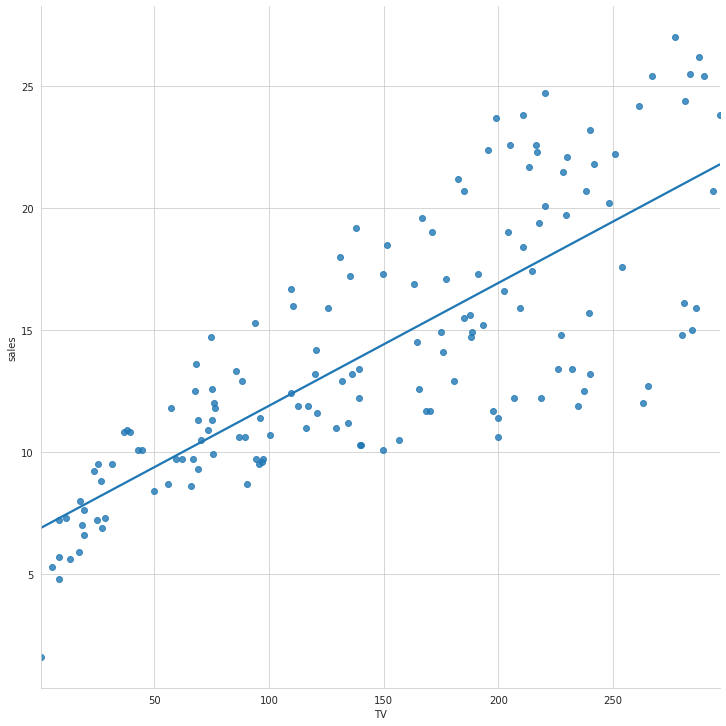

In [ ]:
sns.lmplot(data = ads_train, x = 'TV', y = 'sales', height = 10, ci=None)


plt.xlabel("TV")
plt.ylabel("sales")

plt.show()

### Interpreting the Coeficient of SLR
A good thing about SLR is that we can interpret the $\beta_1$ coefficient in a meaningful way. If for example $\hat{\beta_1} = 2$ in our problem we could say that for a $1$ point increase in TV ad we estimate an increase of $2$ point in sales.

In [ ]:
print("A 1 point increase in TV ad gives an estimated np.round(beta_1_hat,4), additional sales.")

### Accuracy on the testing dataset

In [ ]:
from sklearn.metrics import mean_squared_error
y_test = ads_test.sales.values
y_test_pred = slr.predict(ads_test.sales.values.reshape(-1,1))


print("The testing MSE is",mean_squared_error(y_test,y_test_pred))

### Assumtions of linear regression

In [ ]:
from  sklearn.datasets import make_regression
x, y, coef = make_regression(n_samples=500,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

In [ ]:
regr_df = pd.DataFrame(data={'experience':x.flatten(),'salary':y})
regr_df.head(10)

#### Assumption 1 - A Linear Relationship
There exists a linear relationship between $y$ and $X$. This one is pretty straightforward. If we are going to model $y$ as a linear function of $X$ then we better think that one actually exists.

In [ ]:
# We'll use plt.scatter for this

# first make a figure
# this makes a figure that is 10 units by 10 units
plt.figure(figsize = (10,10))

# plt.scatter plots TV on the x and sales on the y
plt.scatter(regr_df.experience, regr_df.salary)

# place an xlabel
plt.xlabel("experience", fontsize =16)

# place a ylabel
plt.ylabel("salary", fontsize = 16)

# type this to show the plot
plt.show()

Pearson Correlation, $\rho$  is the measure of the <i>strength of the linear relationship</i> between $y$ and $X$.

In [ ]:
# Let's calculate it here

# pandas has a nice corr() function
regr_df[['experience','salary']].corr()

Pearson Correlation is bounded between $-1$ and $1$ with more positive values indicating a strong positive linear relationship, and more negative values indicating a strong negative linear relationship. Our correlation of $0.98$ here indicates that there is strong positive linear relationship between experince and salary.

Potential solutions:
non-linear transformations to dependent/independent variables

#### Assumption 2 - No Autocorrelation in residuals.

We also assume that there is no autocorrelation in resdiuals. Plot your residuals (this is what we call the difference between the predicted values and the actual values, $w_i - \hat{w_i}$) against your feature and other variables of concern. Then you examine the plots to see if there is an obvious relationship. Let's do that below.

In [ ]:
# make the model object
reg = LinearRegression(copy_X = True)

# fit the model
reg.fit(regr_df.experience.values.reshape(-1,1),regr_df.salary.values.ravel())

# predict
pred = reg.predict(regr_df.experience.values.reshape(-1,1))

# Now get the residuals
res = regr_df.salary.values.ravel() - pred

plt.figure(figsize = (12,12))

plt.scatter(regr_df.experience,res)

plt.xlabel("experience", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

Looking at the plot of experience vs residual it seems that the two have no obvious relationship, which is a good sign for our inderpendence assumption. 

Potential solutions:
Correlations in residual frequently occur in the context of time series data. Hence, you might fit time series data

#### Assumption 3 - The Residuals are Normally Distributed with Mean 0 and Equal Variance

The final assumption is on the distribution of the residuals. We say that $\epsilon_i \sim N(0,\sigma^2)$ for all $i$. The assumption on variance is called the homoscedasticity assumption.

We can make a histogram of the residuals to check for a bell curve.

In [ ]:
plt.figure(figsize = (10,8))

plt.hist(res, bins=30)

plt.show()

In [ ]:
import statsmodels.api as sm 

fig,ax = plt.subplots(figsize=(10,8))

# qqplot makes the qqplot
# put in the data you want to plot
# line = 's' plots a line fit to our data
# ax=ax allows us to put the data on the plt subplot object I made
sm.qqplot(res,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show() 

Residuals should have a constant variance
Now we plot the predicted values vs the residuals. If the residuals have equal variance you should expect to see most of the points fall in a band around $0$. We DON'T want to see the points opening up into a funnel shape or closing into a funnel shape.

In [ ]:
plt.figure(figsize=(12,10))

plt.scatter(pred,res)

plt.xlabel("Fitted Values", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)

plt.show()

one possible solution is to transform the response Y using a concave function such as log Y or √
Y .

## Multiple linear regression model

## What Changes Going From One Predictor to Many?

### The Statistical Model

As always assume the data consists of $n$ observations.

Recall that the simple linear regression statistical model is:
$$
y = \beta_0 + \beta_1 X + \epsilon,
$$
where $y$ was your target vector, $X$ a vector of values for a single feature, and $\epsilon$ is a vector of independent $\epsilon_i \sim N(0,\sigma^2)$ for all $i$. 

Now for multiple linear regression let's say you have $m$ features you want to use to predict $y$. Then the model becomes:
$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_m X_m + \epsilon ,
$$
where $X_1,X_2,\dots,X_m$ are the $m$ features, and $\epsilon$ is the same as in SLR. If we collect all of the features as a single column along with a column of $1$s in a larger feature matrix,
$$
X = \left(\begin{array}{c | c | c | c | c}
    1 & X_1 & X_2 & \dots & X_m
\end{array}\right),
$$
and let $\beta=\left(\beta_0, \beta_1, \beta_2,\dots,\beta_m\right)^T$ then the statistical model for MLR becomes:
$$
y = X\beta + \epsilon.
$$

We're still making all of the same assumptions as in SLR, but now $y$ is a linear function of $m$ predictors instead of just $1$. 

### Estimating the Model

When it comes to estimating $\beta$ we can get away with just using the `sklearn` shortcut we learned in SLR I in practice. However, let's show the formula for the estimate $\hat{\beta}$ so we can get behind the black box nature of `sklearn`.

#### Minimizing MSE

We again set out to minimize the MSE
$$
MSE = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y_i} \right)^2 = \frac{1}{n} \sum_{i=1}^n \left( y_i - X_{i,\bullet} \hat{\beta} \right)^2
$$
You can use some rewriting, linear algebra, and matrix differentiation to come up with the following OLS estimate for $\beta$,
$$
\hat{\beta} = (X^TX)^{-1}X^Ty.
$$
This is the estimate of $\beta$ that minimizes the MSE, you may hear people refer to this as the normal equation or the Ordinary Least Squares (OLS) Solution.

How can we decide which predictors to include? 

In [ ]:
ads_train.corr()['sales'].sort_values()

It looks like `radio` and `TV` are the most promising when it comes to having a linear relationship. Both have relatively strong positive linear relationships according to the Pearson correlation. In addition to examining $\rho$, this data set has so few features we can produce pairwise correlation plot. 

In [ ]:
sns.pairplot(ads_train, plot_kws={'s': 7})

plt.show()


It seems that a reasonable starting model would be
$$
\text{sales} = \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio} + \epsilon
$$
Let's fit the coefficients using the formula we just learned before diving into `sklearn`.

In [ ]:
# make X
X = np.ones([len(ads_train),3])
X[:,1] = np.array(ads_train.TV)
X[:,2] = np.array(ads_train.radio)

# Make y
y = np.array(ads_train.sales)

# Calculate beta_hat
beta_hat = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [ ]:
print("beta_0_hat is",np.round(beta_hat[0],5))
print("beta_1_hat is",np.round(beta_hat[1],5))
print("beta_2_hat is",np.round(beta_hat[2],5))
#print("beta_3_hat is",np.round(beta_hat[3],5))

Using sklearn

In [ ]:
# Make the model object
reg = LinearRegression(copy_X = True)
reg.fit(ads_train[['TV','radio']],ads_train['sales'])
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))

#### Predict function

In [ ]:
pred = reg.predict(ads_train[['TV','radio']])
pred[:10]

In [ ]:
y_test = ads_test.sales.values
y_test_pred = reg.predict(ads_test[['TV','radio']])


print("The testing MSE is",mean_squared_error(y_test,y_test_pred))

#### Multiple linear regression Interpretation

We can still interpret the fit, but the specific details are slightly different. Let's interpret $\hat{\beta_1}$, this has been estimated as $0.04645$. We can interpret this as:

<i>for a $1$ unit increase in TV holding all other variables constant, we estimate a $0.04645$ increase in sales.</i>

#### Assumption 4 - Multicollinearity

Collinearity refers to the situation in which two or more predictor variables collinearity
are closely related to one another. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant. <br>

When this occurs the matrix $X^T X$ is not of full rank, which means it is not invertible, but remember
$$
\hat{\beta} = (X^T X)^{-1} X^T y.
$$

So not being invertible is a big problem for us. Fortunately it is rarely the case that one predictor is a perfect linear combination of other predictors. However, one feature being highly correlated with other features can make a matrix close to singular, which is no good for your computer.

A simple way to detect collinearity is to look at the correlation matrix of the predictors. An element of this matrix that is large in absolute value indicates a pair of highly correlated variables, and therefore a collinearity problem in the data. Unfortunately, not all collinearity problems can be
detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity. Instead of inspecting the correlation matrix, a better way to assess multi- collinearity
collinearity is to compute the variance inflation factor. You can read about more details in ISLR book from the refrence.

Refrences: <br>
1) Erdos institute <br>
2) https://ademos.people.uic.edu/Chapter12.html <br>
3) ISLR (Introduction to Statistical learning)